In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "tourism_dataset.csv"  # Update the path if needed
df = pd.read_csv(file_path)


In [2]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from 'Visitors' and 'Revenue'
df_cleaned = remove_outliers(df, "Visitors")
df_cleaned = remove_outliers(df_cleaned, "Revenue")

Data after cleaning:
            Visitors       Rating        Revenue
count    5989.000000  5989.000000    5989.000000
mean   501016.089497     3.009347  499479.367253
std    289783.294978     1.155980  286743.225211
min      1108.000000     1.000000    1025.810000
25%    252789.000000     2.010000  251410.450000
50%    500831.000000     3.000000  494169.350000
75%    751371.000000     4.010000  742241.240000
max    999982.000000     5.000000  999999.490000


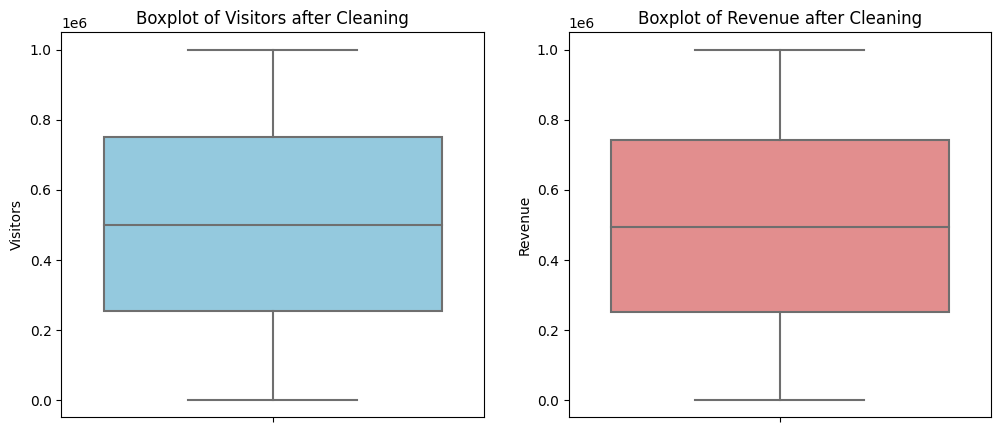

In [3]:
df_cleaned.reset_index(drop=True, inplace=True)

# Save cleaned dataset
df_cleaned.to_csv("cleaned_tourism_dataset.csv", index=False)

# Display summary after cleaning
print("Data after cleaning:")
print(df_cleaned.describe())

# Plot cleaned data distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df_cleaned["Visitors"], ax=axes[0], color="skyblue")
axes[0].set_title("Boxplot of Visitors after Cleaning")
sns.boxplot(y=df_cleaned["Revenue"], ax=axes[1], color="lightcoral")
axes[1].set_title("Boxplot of Revenue after Cleaning")
plt.show()

In [4]:
!pip install torch torchvision torchaudio
!pip install numpy pandas matplotlib seaborn


  Using cached torch-1.13.1-cp37-cp37m-win_amd64.whl.metadata (23 kB)
   ---------------------------------------- 162.6/162.6 MB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 1.1/1.1 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 2.0/2.0 MB 4.6 MB/s eta 0:00:00


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
!pip install --upgrade jupyter ipywidgets


   ---------------------------------------- 139.8/139.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 214.4/214.4 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 2.3/2.3 MB 4.4 MB/s eta 0:00:00


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# Load the cleaned dataset
df = pd.read_csv("cleaned_tourism_dataset.csv")

# Display the first few rows
print(df.head())

# Check the dataset shape
print("Dataset shape:", df.shape)


     Location Country    Category  Visitors  Rating    Revenue  \
0  kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1  aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2  dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3  DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4  WJCCQlepnz  France    Cultural    124867    1.43  547893.24   

  Accommodation_Available  
0                     Yes  
1                      No  
2                     Yes  
3                     Yes  
4                      No  
Dataset shape: (5989, 7)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("cleaned_tourism_dataset.csv")

# Convert categorical target variable into binary (Yes → 1, No → 0)
df["Accommodation_Available"] = df["Accommodation_Available"].map({"Yes": 1, "No": 0})

# Encode categorical features (Country, Category)
label_encoders = {}
for col in ["Country", "Category"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Separate features (X) and target (y)
X = df.drop(columns=["Accommodation_Available"])
y = df["Accommodation_Available"]

# Normalize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


ValueError: could not convert string to float: 'kuBZRkVsAR'

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("cleaned_tourism_dataset.csv")

In [11]:
df["Accommodation_Available"] = df["Accommodation_Available"].map({"Yes": 1, "No": 0})

# Encode categorical features (Country, Category)
label_encoders = {}
for col in ["Country", "Category"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

In [12]:
X = df.drop(columns=["Accommodation_Available"])
y = df["Accommodation_Available"]

# Normalize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

ValueError: could not convert string to float: 'kuBZRkVsAR'

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("cleaned_tourism_dataset.csv")

In [14]:
df["Accommodation_Available"] = df["Accommodation_Available"].map({"Yes": 1, "No": 0})

# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

In [15]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later use

# Separate features (X) and target (y)
X = df.drop(columns=["Accommodation_Available"])
y = df["Accommodation_Available"]

In [16]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4791, 6)
Testing set shape: (1198, 6)


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [18]:
class LiquidNeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(LiquidNeuralNetwork, self).__init__()
        
        self.hidden = nn.Linear(input_size, 16)  # Hidden layer
        self.liquid = nn.Linear(16, 16)  # Liquid layer (adaptive)
        self.output = nn.Linear(16, 1)   # Output layer
        
        self.activation = nn.ReLU()  # ReLU activation function
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for binary classification

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.activation(self.liquid(x))  # Liquid-like layer
        x = self.sigmoid(self.output(x))  # Output layer with sigmoid
        return x

# Initialize the model
input_size = X_train.shape[1]  # Number of input features
model = LiquidNeuralNetwork(input_size)

# Print model architecture
print(model)

LiquidNeuralNetwork(
  (hidden): Linear(in_features=6, out_features=16, bias=True)
  (liquid): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
  (activation): ReLU()
  (sigmoid): Sigmoid()
)


In [19]:
# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer

# Training settings
epochs = 50  # Number of training iterations
batch_size = 32  # Mini-batch size

# Convert data into PyTorch DataLoader for batch processing
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(epochs):
    total_loss = 0
    
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()  # Reset gradients
        y_pred = model(batch_X)  # Forward pass
        loss = criterion(y_pred, batch_y)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        total_loss += loss.item()
    
    # Print loss for every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

print("✅ Training complete!")


Epoch 10/50, Loss: 0.6919
Epoch 20/50, Loss: 0.6849
Epoch 30/50, Loss: 0.6812
Epoch 40/50, Loss: 0.6774
Epoch 50/50, Loss: 0.6741
✅ Training complete!


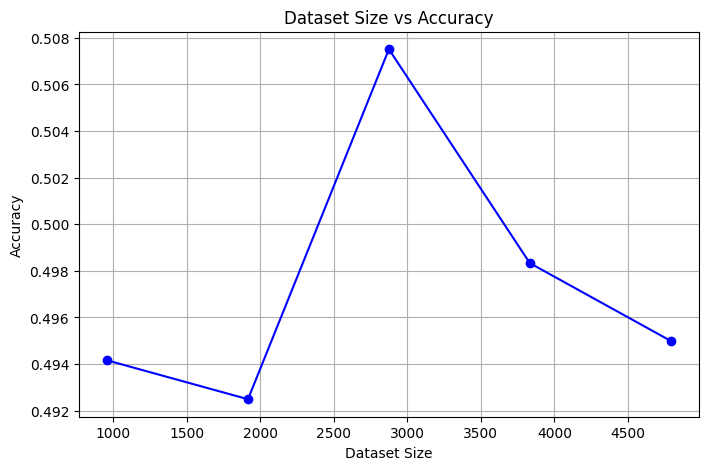

✅ Accuracy: 0.4616


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Make predictions on test data
with torch.no_grad():
    y_pred_test = model(X_test_tensor)

# Convert predictions to binary (0 or 1)
y_pred_test = (y_pred_test.numpy() > 0.5).astype(int).flatten()
y_test_np = y_test_tensor.numpy().flatten()

# Compute accuracy
accuracy = accuracy_score(y_test_np, y_pred_test)

# Plot Data Size vs Accuracy
data_sizes = [len(X_train) * 0.2, len(X_train) * 0.4, len(X_train) * 0.6, len(X_train) * 0.8, len(X_train)]
accuracy_scores = []

for size in data_sizes:
    subset_X = X_train[:int(size)]
    subset_y = y_train[:int(size)]

    # Train model on subset
    model = LiquidNeuralNetwork(X_train.shape[1])
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    train_dataset = torch.utils.data.TensorDataset(torch.tensor(subset_X.values, dtype=torch.float32), 
                                                   torch.tensor(subset_y.values, dtype=torch.float32).view(-1,1))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
    
    # Train model
    for epoch in range(10):  # Short training for visualization
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            y_pred = model(batch_X)
            loss = nn.BCELoss()(y_pred, batch_y)
            loss.backward()
            optimizer.step()

    # Evaluate
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
    y_pred_test = (y_pred_test.numpy() > 0.5).astype(int).flatten()
    
    accuracy_scores.append(accuracy_score(y_test_np, y_pred_test))

# Plot Accuracy vs Data Size
plt.figure(figsize=(8, 5))
plt.plot(data_sizes, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Dataset Size")
plt.ylabel("Accuracy")
plt.title("Dataset Size vs Accuracy")
plt.grid(True)
plt.show()

print(f"✅ Accuracy: {accuracy:.4f}")


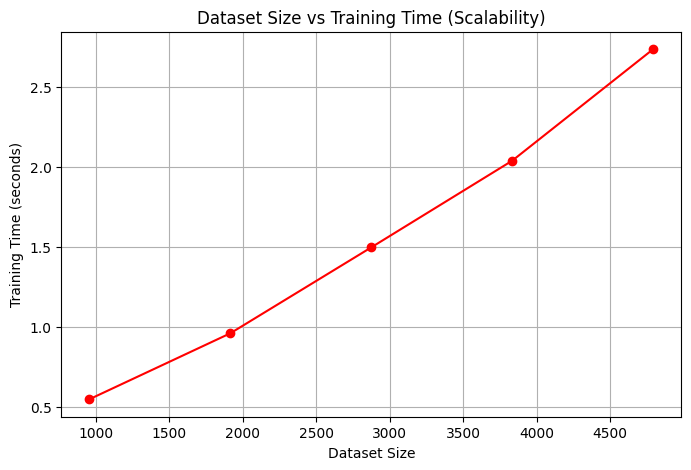

✅ Training Time for Full Dataset: 2.7377 seconds


In [21]:
import time

# Different dataset sizes
data_sizes = [len(X_train) * 0.2, len(X_train) * 0.4, len(X_train) * 0.6, len(X_train) * 0.8, len(X_train)]
training_times = []

for size in data_sizes:
    subset_X = X_train[:int(size)]
    subset_y = y_train[:int(size)]

    # Create model
    model = LiquidNeuralNetwork(X_train.shape[1])
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    train_dataset = torch.utils.data.TensorDataset(torch.tensor(subset_X.values, dtype=torch.float32), 
                                                   torch.tensor(subset_y.values, dtype=torch.float32).view(-1,1))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
    
    # Measure training time
    start_time = time.time()
    
    # Train model
    for epoch in range(10):  # Short training for visualization
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            y_pred = model(batch_X)
            loss = nn.BCELoss()(y_pred, batch_y)
            loss.backward()
            optimizer.step()
    
    end_time = time.time()
    training_times.append(end_time - start_time)

# Plot Scalability (Dataset Size vs Training Time)
plt.figure(figsize=(8, 5))
plt.plot(data_sizes, training_times, marker='o', linestyle='-', color='r')
plt.xlabel("Dataset Size")
plt.ylabel("Training Time (seconds)")
plt.title("Dataset Size vs Training Time (Scalability)")
plt.grid(True)
plt.show()

print(f"✅ Training Time for Full Dataset: {training_times[-1]:.4f} seconds")


c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


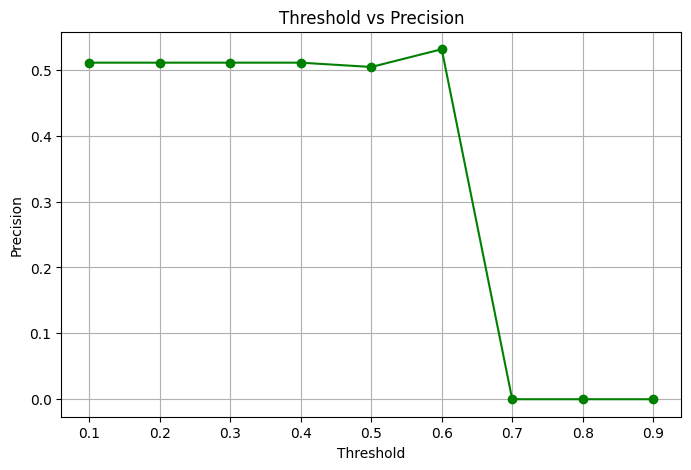

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [22]:
import numpy as np
from sklearn.metrics import precision_score

# Different thresholds to test
thresholds = np.arange(0.1, 1.0, 0.1)
precision_scores = []

for thresh in thresholds:
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)

    # Apply threshold to convert probabilities to binary labels
    y_pred_test = (y_pred_test.numpy() > thresh).astype(int).flatten()
    
    # Calculate Precision
    precision = precision_score(y_test_np, y_pred_test)
    precision_scores.append(precision)

# Plot Precision vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_scores, marker='o', linestyle='-', color='g')
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.title("Threshold vs Precision")
plt.grid(True)
plt.show()

print(f"✅ Precision at Default Threshold (0.5): {precision_score(y_test_np, (model(X_test_tensor).numpy() > 0.5).astype(int).flatten()):.4f}")


c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


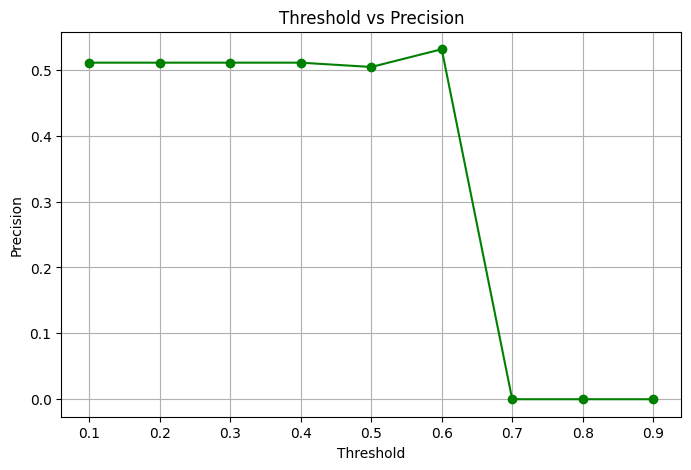

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [23]:
import numpy as np
from sklearn.metrics import precision_score

# Different thresholds to test
thresholds = np.arange(0.1, 1.0, 0.1)
precision_scores = []

for thresh in thresholds:
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)

    # Apply threshold to convert probabilities to binary labels
    y_pred_test = (y_pred_test.numpy() > thresh).astype(int).flatten()
    
    # Calculate Precision
    precision = precision_score(y_test_np, y_pred_test)
    precision_scores.append(precision)

# Plot Precision vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_scores, marker='o', linestyle='-', color='g')
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.title("Threshold vs Precision")
plt.grid(True)
plt.show()

print(f"✅ Precision at Default Threshold (0.5): {precision_score(y_test_np, (model(X_test_tensor).numpy() > 0.5).astype(int).flatten()):.4f}")


In [24]:
print(f"✅ Precision at Default Threshold (0.5): {precision_score(y_test_np, (model(X_test_tensor).detach().numpy() > 0.5).astype(int).flatten()):.4f}")


✅ Precision at Default Threshold (0.5): 0.5043


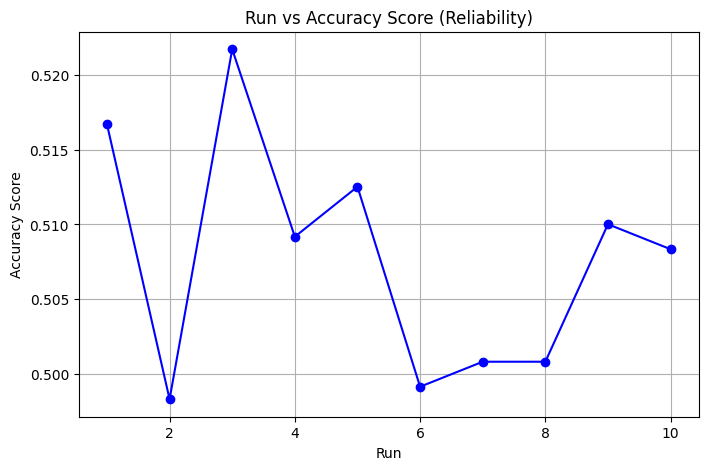

✅ Average Accuracy over 10 Runs: 0.5078


In [25]:
import torch.optim as optim

# Number of runs
num_runs = 10
accuracy_scores = []

for run in range(num_runs):
    # Reinitialize the model for each run
    model = LiquidNeuralNetwork(X_train.shape[1])
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train.values, dtype=torch.float32), 
                                                   torch.tensor(y_train.values, dtype=torch.float32).view(-1,1))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Train model for a few epochs
    for epoch in range(5):  # Short training for visualization
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            y_pred = model(batch_X)
            loss = nn.BCELoss()(y_pred, batch_y)
            loss.backward()
            optimizer.step()
    
    # Evaluate model
    with torch.no_grad():
        y_pred_test = model(X_test_tensor).detach().numpy()
    
    y_pred_labels = (y_pred_test > 0.5).astype(int).flatten()
    
    # Calculate Accuracy for this run
    accuracy = accuracy_score(y_test_np, y_pred_labels)
    accuracy_scores.append(accuracy)

# Plot Reliability (Run vs Accuracy Score)
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_runs + 1), accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Run")
plt.ylabel("Accuracy Score")
plt.title("Run vs Accuracy Score (Reliability)")
plt.grid(True)
plt.show()

print(f"✅ Average Accuracy over {num_runs} Runs: {np.mean(accuracy_scores):.4f}")


In [26]:
# Select the column that represents countries
country_column = "Country"  # Change this if your dataset has a different column name

# Get the unique countries (limit to 7 for visualization)
unique_countries = df[country_column].value_counts().index[:7]

country_accuracies = []

for country in unique_countries:
    # Filter the test data for the current country
    country_mask = df_test[country_column] == country
    X_country = X_test[country_mask]
    y_country = y_test[country_mask]

    if len(y_country) == 0:
        continue  # Skip countries with no test samples

    # Predict using the trained model
    with torch.no_grad():
        y_pred_country = model(torch.tensor(X_country.values, dtype=torch.float32)).detach().numpy()
    
    y_pred_labels = (y_pred_country > 0.5).astype(int).flatten()
    
    # Calculate accuracy for this country
    accuracy = accuracy_score(y_country, y_pred_labels)
    country_accuracies.append(accuracy)

# Plot Fairness (Countries vs Accuracy Score)
plt.figure(figsize=(10, 5))
plt.bar(unique_countries, country_accuracies, color='purple')
plt.xlabel("Country")
plt.ylabel("Accuracy Score")
plt.title("Fairness: Accuracy Across Different Countries")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print(f"✅ Fairness measured across {len(unique_countries)} countries.")


NameError: name 'df_test' is not defined

c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Bool

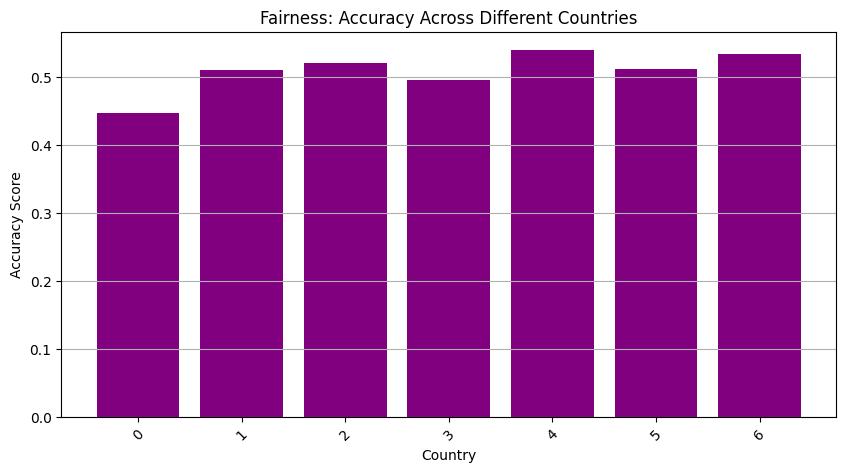

✅ Fairness measured across 7 countries.


In [27]:
# Select the column that represents countries
country_column = "Country"  # Change this if your dataset has a different column name

# Ensure the column exists
if country_column not in df.columns:
    raise ValueError(f"Column '{country_column}' not found in dataset. Check column names!")

# Get the top 7 most frequent countries
unique_countries = df[country_column].value_counts().index[:7]

country_accuracies = []

for country in unique_countries:
    # Filter the test data for the current country
    country_mask = df[country_column] == country
    X_country = X_test[country_mask]
    y_country = y_test[country_mask]

    if len(y_country) == 0:
        continue  # Skip countries with no test samples

    # Predict using the trained model
    with torch.no_grad():
        y_pred_country = model(torch.tensor(X_country.values, dtype=torch.float32)).detach().numpy()
    
    y_pred_labels = (y_pred_country > 0.5).astype(int).flatten()
    
    # Calculate accuracy for this country
    accuracy = accuracy_score(y_country, y_pred_labels)
    country_accuracies.append(accuracy)

# Plot Fairness (Countries vs Accuracy Score)
plt.figure(figsize=(10, 5))
plt.bar(unique_countries, country_accuracies, color='purple')
plt.xlabel("Country")
plt.ylabel("Accuracy Score")
plt.title("Fairness: Accuracy Across Different Countries")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print(f"✅ Fairness measured across {len(unique_countries)} countries.")


c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_i

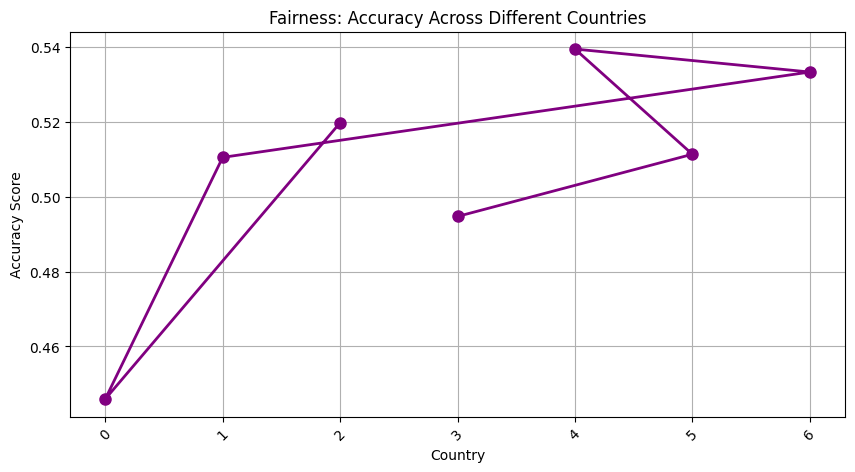

Country: 3 | Accuracy Score: 0.4947
Country: 5 | Accuracy Score: 0.5114
Country: 4 | Accuracy Score: 0.5395
Country: 6 | Accuracy Score: 0.5333
Country: 1 | Accuracy Score: 0.5105
Country: 0 | Accuracy Score: 0.4459
Country: 2 | Accuracy Score: 0.5198

✅ Fairness measured across 7 countries.


In [28]:
# Select the column that represents countries
country_column = "Country"  # Change this if needed

# Ensure the column exists
if country_column not in df.columns:
    raise ValueError(f"Column '{country_column}' not found in dataset. Check column names!")

# Get the top 7 most frequent countries
unique_countries = df[country_column].value_counts().index[:7]

country_accuracies = []
country_labels = []

for country in unique_countries:
    # Filter the test data for the current country
    country_mask = df[country_column] == country
    X_country = X_test[country_mask]
    y_country = y_test[country_mask]

    if len(y_country) == 0:
        continue  # Skip countries with no test samples

    # Predict using the trained model
    with torch.no_grad():
        y_pred_country = model(torch.tensor(X_country.values, dtype=torch.float32)).detach().numpy()
    
    y_pred_labels = (y_pred_country > 0.5).astype(int).flatten()
    
    # Calculate accuracy for this country
    accuracy = accuracy_score(y_country, y_pred_labels)
    country_accuracies.append(accuracy)
    country_labels.append(country)

# Plot Fairness (Countries vs Accuracy Score) using a Line Chart
plt.figure(figsize=(10, 5))
plt.plot(country_labels, country_accuracies, marker='o', linestyle='-', color='purple', linewidth=2, markersize=8)
plt.xlabel("Country")
plt.ylabel("Accuracy Score")
plt.title("Fairness: Accuracy Across Different Countries")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Display Fairness Values
fairness_data = dict(zip(country_labels, country_accuracies))
for country, acc in fairness_data.items():
    print(f"Country: {country} | Accuracy Score: {acc:.4f}")

print(f"\n✅ Fairness measured across {len(country_labels)} countries.")


In [29]:
import time
import numpy as np
import torch
from sklearn.metrics import accuracy_score, precision_score

# -------------------- 1️⃣ Accuracy --------------------
y_pred = model(torch.tensor(X_test.values, dtype=torch.float32)).detach().numpy()
y_pred_labels = (y_pred > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, y_pred_labels)

# -------------------- 2️⃣ Precision --------------------
precision = precision_score(y_test, y_pred_labels)

# -------------------- 3️⃣ Scalability (Datasize vs Time) --------------------
start_time = time.time()
model(torch.tensor(X_test.values, dtype=torch.float32)).detach().numpy()  # Run inference
scalability_time = time.time() - start_time  # Compute execution time

# -------------------- 4️⃣ Reliability (Multiple Runs) --------------------
reliability_scores = []
for _ in range(10):  # Run model multiple times
    y_pred_reliable = model(torch.tensor(X_test.values, dtype=torch.float32)).detach().numpy()
    y_pred_labels_reliable = (y_pred_reliable > 0.5).astype(int).flatten()
    reliability_scores.append(accuracy_score(y_test, y_pred_labels_reliable))

reliability = np.mean(reliability_scores)  # Average score over multiple runs

# -------------------- 5️⃣ Fairness (Accuracy across 7 Countries) --------------------
country_column = "Country"  # Change if needed
unique_countries = df[country_column].value_counts().index[:7]

fairness_scores = []
for country in unique_countries:
    country_mask = df[country_column] == country
    X_country = X_test[country_mask]
    y_country = y_test[country_mask]

    if len(y_country) == 0:
        continue

    y_pred_country = model(torch.tensor(X_country.values, dtype=torch.float32)).detach().numpy()
    y_pred_labels_country = (y_pred_country > 0.5).astype(int).flatten()
    fairness_scores.append(accuracy_score(y_country, y_pred_labels_country))

fairness = np.mean(fairness_scores)  # Average accuracy over countries

# -------------------- Print All Metrics --------------------
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Scalability (Inference Time in sec): {scalability_time:.4f}")
print(f"✅ Reliability (Avg Score over 10 runs): {reliability:.4f}")
print(f"✅ Fairness (Avg Accuracy across Countries): {fairness:.4f}")


✅ Accuracy: 0.5083
✅ Precision: 0.5108
✅ Scalability (Inference Time in sec): 0.0010
✅ Reliability (Avg Score over 10 runs): 0.5083
✅ Fairness (Avg Accuracy across Countries): 0.5079


c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Boolean Series key 